Bu veri seti, ismi verilmemiş bir havayolu şirketinin yolcu memnuniyet anketini içermektedir.
Memnun (veya memnun olmayan) bir yolcuyla yüksek düzeyde ilişkili olan faktörleri öğrenmek firma için oldukça önemlidir.
Çünkü havayollarının daha memnun müşteriler yaratmak için sundukları hizmetlerin hangi yönünün daha fazla vurgulanması gerektiğini bilmeleri gerekir.
Bu veri setinin temel amacı, diğer parametre değerlerinin ayrıntıları verildiğinde gelecekteki bir müşterinin hizmetten memnun olup olmayacağını tahmin etmektir.

____________________
Parametreler:

Gender: Yolcuların cinsiyeti (Female, Male)

Customer Type: Müşteri tipi (Loyal Customer, disloyal Customer)

Age: Yolcuların gerçek yaşı

Type of Travel: Yolcuların uçuş amacı (Business travel, Personal Travel)

Class: Yolcuların uçakta seyahat sınıfı (Business, Eco, Eco Plus)

Flight Distance: Bu yolculuğun uçuş mesafesi

Inflight wifi service: Uçak içi wifi hizmetinden memnuniyet düzeyi (0:Uygulanamaz;1-5)

Departure/Arrival time convenient: Uygun Kalkış/Varış saatinin memnuniyet düzeyi

Ease of Online booking: Çevrimiçi rezervasyonun memnuniyet düzeyi

Gate location: Kapı konumunun memnuniyet düzeyi

Food and drink: Yiyecek ve içecekten memnuniyet düzeyi

Online boarding: Çevrimiçi biniş memnuniyet düzeyi

Seat comfort: Koltuk konforundan memnuniyet seviyesi

Inflight entertainment: Uçak içi eğlencenin memnuniyet düzeyi

On-board service: Araç içi hizmetten memnuniyet düzeyi

Leg room service: herhangi iki koltuk arasında ayaklar için bırakılmış mesafeden  memnuniyet düzeyi

Baggage handling: Bagaj taşıma memnuniyet düzeyi

Checkin service: Check-in hizmetinden memnuniyet düzeyi

Inflight service: Uçak içi hizmetten memnuniyet düzeyi

Cleanliness: Temizlikten Memnuniyet Düzeyi

Departure Delay in Minutes: Kalkışta gecikmeli dakika

Arrival Delay in Minutes: Varışta geciken dakikalar

satisfaction: Havayolu memnuniyet düzeyi (Memnuniyet, tarafsızlık veya memnuniyetsizlik)

# IMPORTLAR:

In [1]:
pip install pydotplus


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=8750681a4c450cd70d65f0eec9bc11dddf9850886f67f0be854571035f745638
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install skompiler


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 587.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54286 sha256=8e534fb1f3662cf31b05e5dc30c0da1e94287c91ebaf58e46c372819b502b868
  Stored in directory: /root/.cache/pip/wheels/47/1c/59/b80a730f4afd2144bad854df4b167b812486c9d4c1bd4cf4c5
Successfully built skompiler
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install astor


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import joblib
from skompiler import skompile
import pydotplus
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from skompiler import skompile
import graphviz
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import plot_confusion_matrix
warnings.simplefilter(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# FORMÜLLER:

In [6]:
# keşifçi veri analizi için:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

# kategorik değişken özetleme
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

# numerik değişken özetleme
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

# bağımlı değişkeni sayısal değişken ile özetleme
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

# bağımlı değişkeni kategorik değişken ile özetleme
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

# korelasyon matrisini oluşturma
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

# kategorik, numerik, numerik görünümlü kategorik ve kategorik ama kardinal değişkenleri düzenleme
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column], color="g")
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

# aykırı değer üst ve alt limitlerini bulma
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# aykırı değerleri üst ve alt limitler ile değiştirme
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# aykırı gözlem var mı diye bakma
def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

# eksik değerleri bulmak için
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
    
# Eksik Değerlerin Bağımlı Değişken ile İlişkisinin İncelenmesi    
def missing_vs_target(dataframe, target, na_columns): 
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")
# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

# one hot encoder işlemi yani kategorikleri 0 ve 1 düzenine geçirme
# kullanırken drop_first = True olmalı ki dummy değişken tuzağına takılmayalım
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

# tüm modeller için sonuçları inceleyebilmek için base_model fonksiyonu:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

# en iyi modeli kurmak için gerekli olan hiperparametreleri bulmak için:
def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

# en iyi parametrelerle en uygun sınıflandırma yöntemini bulma
def voting_classifier(best_models, X, y):
    print("Voting Classifier...")

    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]),
                                              ('RF', best_models["RF"]),
                                              ('LightGBM', best_models["LightGBM"])],
                                  voting='soft').fit(X, y)

    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf

def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()
    
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)


# VERİYİ HAZIRLAMA

In [7]:
traindf = pd.read_csv("../input/airline-passenger-satisfaction/train.csv")
testdf = pd.read_csv("../input/airline-passenger-satisfaction/test.csv")

In [8]:
traindf.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'], dtype='object')

In [9]:
testdf.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'], dtype='object')

In [10]:
df = pd.concat([traindf, testdf], sort=False)

In [11]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [12]:
df["satisfaction"] = df["satisfaction"].apply(lambda x: 1 if x == "satisfied" else 0)

Inflight wifi service için "0:Not" denmektedir. bu aslında boş - uygulanamaz olan değerlerin 0 ile doldurulduğu anlamına gelmektedir. 
0'ları nan değere dönüştürüp medyan ile dolduruyorum:

In [13]:
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col in ['Inflight wifi service'])]

In [14]:
zero_columns

['Inflight wifi service']

In [15]:
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [16]:
for col in zero_columns:
    df.loc[df[col].isnull(), col] = df[col].median()

# KEŞİFÇİ VERİ ANALİZİ

In [17]:
# Genel resim
check_df(df)

##################### Shape #####################
(129880, 24)
##################### Types #####################
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                float64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                

shape: 129880, 24

Arrival Delay in Minutes içinde 393 adet boş değişken var. eksik gözlem analizi yapılmalı.

Puanlamaların bulunduğu değerlendirme değişkenleri int olarak görünüyor. cat_cols, num_cols, cat_but_car düzenlemesi yapılmalı.

Uçuş mesafeleri ve kalkış-biniş gecikme dakikaları için aykırı değer gözlemi yapılmalı. 

In [18]:
# kategorik, numerik, numerik görünümlü kategorik ve kategorik ama kardinal değişkenleri düzenleme
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=7, car_th=20)

In [19]:
cat_cols

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'satisfaction']

işlem düzgünlüğü için değişkenlerde bululunan boşlukları _ ile değiştirilmeli

In [20]:
num_cols

['id',
 'Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

id içinde çoklama olmadığı için her satır benzersiz bir kişiye aittir. numerik sayılmayacak bu id değişkeni gereksizdir. kaldırılmalı.

In [21]:
df.drop("id", axis=1,inplace=True)

In [22]:
# id olmadan kategorik, numerik, numerik görünümlü kategorik ve kategorik ama kardinal değişkenleri düzenleme
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=7, car_th=20)

In [23]:
# Kategorik değişkenlerin incelenmesi
for col in cat_cols:
    cat_summary(df, col)

        Gender  Ratio
Female   65899 50.738
Male     63981 49.262
##########################################
                   Customer Type  Ratio
Loyal Customer            106100 81.691
disloyal Customer          23780 18.309
##########################################
                 Type of Travel  Ratio
Business travel           89693 69.058
Personal Travel           40187 30.942
##########################################
          Class  Ratio
Business  62160 47.860
Eco       58309 44.895
Eco Plus   9411  7.246
##########################################
       Inflight wifi service  Ratio
3.000                  36101 27.796
2.000                  32320 24.885
4.000                  24775 19.075
1.000                  22328 17.191
5.000                  14356 11.053
##########################################
   Departure/Arrival time convenient  Ratio
4                              31880 24.546
5                              27998 21.557
3                              22378 17.23

count   129880.000
mean        39.428
std         15.119
min          7.000
5%          15.000
10%         20.000
20%         25.000
30%         30.000
40%         36.000
50%         40.000
60%         44.000
70%         49.000
80%         54.000
90%         59.000
95%         64.000
99%         70.000
max         85.000
Name: Age, dtype: float64


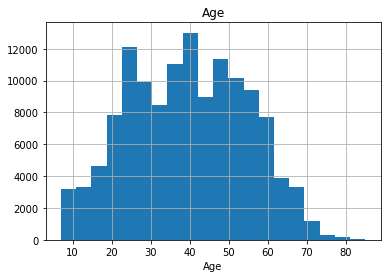

count   129880.000
mean      1190.316
std        997.452
min         31.000
5%         176.950
10%        236.000
20%        358.000
30%        483.000
40%        631.000
50%        844.000
60%       1050.000
70%       1513.000
80%       2072.000
90%       2751.000
95%       3380.000
99%       3884.000
max       4983.000
Name: Flight Distance, dtype: float64


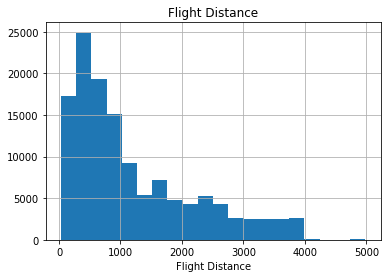

count   129880.000
mean        14.714
std         38.071
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          2.000
70%          8.000
80%         19.000
90%         44.000
95%         77.000
99%        180.000
max       1592.000
Name: Departure Delay in Minutes, dtype: float64


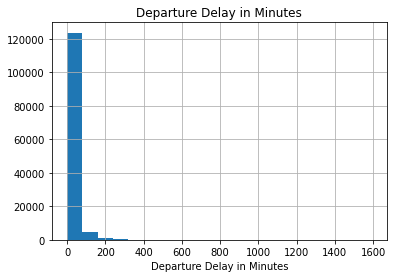

count   129487.000
mean        15.091
std         38.466
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          2.000
70%          9.000
80%         19.000
90%         44.000
95%         78.000
99%        182.000
max       1584.000
Name: Arrival Delay in Minutes, dtype: float64


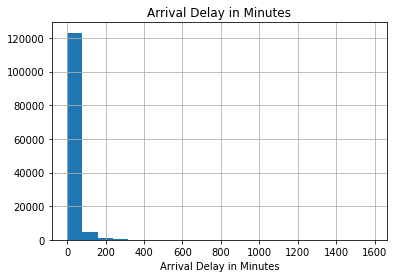

In [24]:
# Sayısal değişkenlerin incelenmesi
df[num_cols].describe().T
for col in num_cols:
    num_summary(df, col, plot=True)

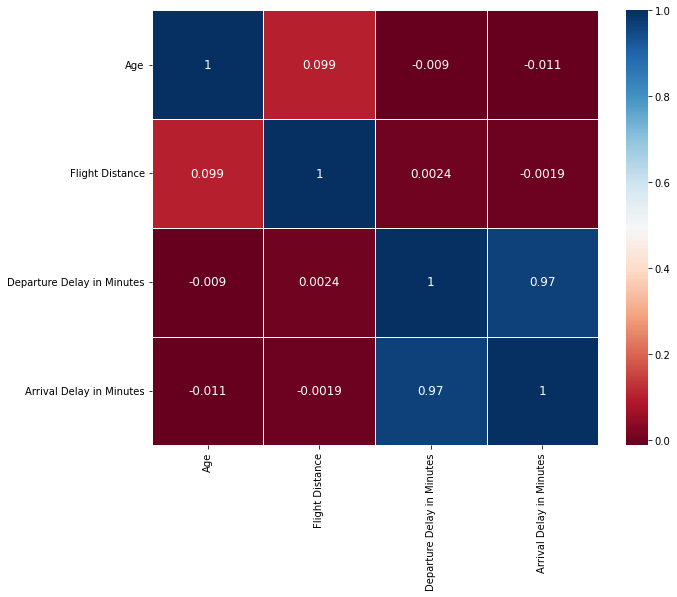

In [25]:
# Sayısal değişkenkerin birbirleri ile korelasyonu
correlation_matrix(df, num_cols)

Departure Delay in Minutes ve Arrival Delay in Minutes birbiri ile yüksek korelasyonlu görünüyor. Zaten gecikmeli kalkış yapan bir uçak gecikmeli iniş yapacaktır.  

In [26]:
# Target ile sayısal değişkenlerin incelemesi
for col in num_cols:
    target_summary_with_num(df, "satisfaction", col)

                Age
satisfaction       
0            37.651
1            41.741


              Flight Distance
satisfaction                 
0                     929.715
1                    1529.539


              Departure Delay in Minutes
satisfaction                            
0                                 16.407
1                                 12.510


              Arrival Delay in Minutes
satisfaction                          
0                               17.056
1                               12.534




yaş ortalaması daha büyük olduğunda memnuniyet artıyor gibi görünüyor. ancak 0-1ler için yaş ortalamasına bakıldığında çok da bir fark yok gibi görünüyor. yeni yaş değişkenleri oluşturup tekrar incelenmeli. arrival ve departure gecikmelerine bakılınca doğal olarak gecikme az olduğunda memnuniyetin arttığını söyleyebiliriz. uzak mesafelerde de memnuniyet var gibi görünüyor.

eksik gözlem analizi:

In [27]:
df.isnull().values.any()  # eksik gozlem var mı yok mu sorgusu


True

In [28]:
df.isnull().sum()  # degiskenlerdeki eksik deger sayisi. hangisinde kaç eksik değer var


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [29]:
df.isnull().sum().sum()  # veri setindeki toplam eksik deger sayisi


393

In [30]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)  # eksik değerlerin tüm verilere oranı


Arrival Delay in Minutes            0.303
Gender                              0.000
Seat comfort                        0.000
Departure Delay in Minutes          0.000
Cleanliness                         0.000
Inflight service                    0.000
Checkin service                     0.000
Baggage handling                    0.000
Leg room service                    0.000
On-board service                    0.000
Inflight entertainment              0.000
Online boarding                     0.000
Customer Type                       0.000
Food and drink                      0.000
Gate location                       0.000
Ease of Online booking              0.000
Departure/Arrival time convenient   0.000
Inflight wifi service               0.000
Flight Distance                     0.000
Class                               0.000
Type of Travel                      0.000
Age                                 0.000
satisfaction                        0.000
dtype: float64

In [31]:
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]  # eksik değer sayısı 0'dan büyük olan değişkenler

aykırı gözlem analizi

In [32]:
for col in num_cols:
    print(col, check_outlier(df, col, 0.05, 0.95))

Age False
Flight Distance False
Departure Delay in Minutes True
Arrival Delay in Minutes True


uçuş mesafelerinde de aykırı değer çıkmasını bekliyordum ancak çıkmadı 

aykırı değer çıkan değişkenler:

Departure Delay in Minutes True

Arrival Delay in Minutes True


Korelasyon analizi:

In [33]:
df.corr()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Age,1.000,0.099,0.010,0.037,0.023,-0.000,0.023,0.208,0.159,0.075,0.057,0.039,-0.048,0.033,-0.051,0.053,-0.009,-0.011,0.134
Flight Distance,0.099,1.000,0.010,-0.019,0.065,0.006,0.057,0.215,0.158,0.131,0.111,0.135,0.065,0.074,0.059,0.096,0.002,-0.002,0.298
Inflight wifi service,0.010,0.010,1.000,0.321,0.627,0.354,0.140,0.435,0.136,0.210,0.124,0.153,0.116,0.062,0.106,0.144,-0.025,-0.028,0.387
Departure/Arrival time convenient,0.037,-0.019,0.321,1.000,0.438,0.448,0.001,0.072,0.009,-0.008,0.067,0.011,0.071,0.091,0.072,0.010,0.001,-0.001,-0.054
Ease of Online booking,0.023,0.065,0.627,0.438,1.000,0.460,0.031,0.405,0.029,0.047,0.039,0.109,0.039,0.009,0.035,0.015,-0.005,-0.007,0.169
Gate location,-0.000,0.006,0.354,0.448,0.460,1.000,-0.003,0.003,0.003,0.003,-0.029,-0.005,0.001,-0.039,0.000,-0.006,0.006,0.006,-0.003
Food and drink,0.023,0.057,0.140,0.001,0.031,-0.003,1.000,0.234,0.576,0.623,0.057,0.033,0.035,0.085,0.035,0.658,-0.029,-0.032,0.211
Online boarding,0.208,0.215,0.435,0.072,0.405,0.003,0.234,1.000,0.419,0.284,0.154,0.123,0.084,0.204,0.074,0.329,-0.019,-0.023,0.502
Seat comfort,0.159,0.158,0.136,0.009,0.029,0.003,0.576,0.419,1.000,0.612,0.131,0.104,0.075,0.190,0.069,0.680,-0.028,-0.031,0.349
Inflight entertainment,0.075,0.131,0.210,-0.008,0.047,0.003,0.623,0.284,0.612,1.000,0.419,0.300,0.379,0.120,0.406,0.693,-0.027,-0.030,0.398


Korelasyon Matrisi

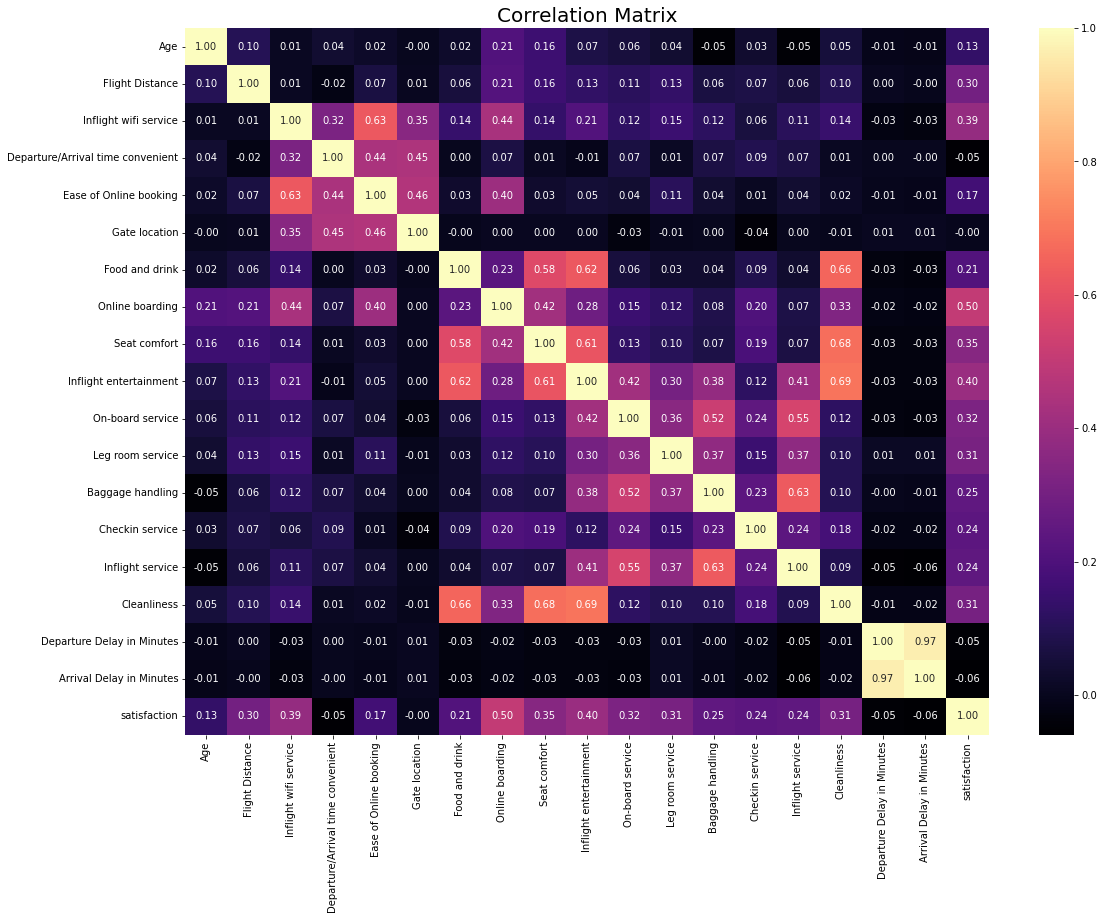

In [34]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

Çok güçlü korelasyonlar (0.8 ile 1 veya -0.8 ile -1.0 arası değerler): -

Güçlü korelasyonlar (0.6 ile 0.8 veya -0.6 ile -0.8 arası değerler): -

Orta derece korelasyonlar (0.4 ile 0.6 veya -0.4 ile -0.6 arası değerler): online boarding(0.50), inflight entertainment(0.40)

In [35]:
df.corrwith(df["satisfaction"]).sort_values(ascending=False)

satisfaction                         1.000
Online boarding                      0.502
Inflight entertainment               0.398
Inflight wifi service                0.387
Seat comfort                         0.349
On-board service                     0.322
Leg room service                     0.312
Cleanliness                          0.307
Flight Distance                      0.298
Baggage handling                     0.249
Inflight service                     0.245
Checkin service                      0.237
Food and drink                       0.211
Ease of Online booking               0.169
Age                                  0.134
Gate location                       -0.003
Departure Delay in Minutes          -0.051
Departure/Arrival time convenient   -0.054
Arrival Delay in Minutes            -0.058
dtype: float64

# FEATURE ENGINEERING

Eksik değerler:

In [36]:
na_columns = missing_values_table(df, na_name=True)

                          n_miss  ratio
Arrival Delay in Minutes     393  0.300


Eksik değerleri doldurma:

In [37]:
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median(), inplace=True)

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.000,39.428,15.119,7.000,27.000,40.000,51.000,85.000
Flight Distance,129880.000,1190.316,997.452,31.000,414.000,844.000,1744.000,4983.000
Inflight wifi service,129880.000,2.819,1.240,1.000,2.000,3.000,4.000,5.000
Departure/Arrival time convenient,129880.000,3.058,1.527,0.000,2.000,3.000,4.000,5.000
Ease of Online booking,129880.000,2.757,1.402,0.000,2.000,3.000,4.000,5.000
Gate location,129880.000,2.977,1.279,0.000,2.000,3.000,4.000,5.000
Food and drink,129880.000,3.205,1.330,0.000,2.000,3.000,4.000,5.000
Online boarding,129880.000,3.253,1.351,0.000,2.000,3.000,4.000,5.000
Seat comfort,129880.000,3.441,1.319,0.000,2.000,4.000,5.000,5.000
Inflight entertainment,129880.000,3.358,1.334,0.000,2.000,4.000,4.000,5.000


aykırı değerlerin düzeltilmesi:

In [39]:
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

Age False
Flight Distance True
Departure Delay in Minutes True
Arrival Delay in Minutes True


In [40]:
check_outlier(df,num_cols)

False

Yeni değişkenler oluşturma:

In [41]:
df.columns = [col.upper() for col in df.columns]

In [42]:
df.columns = [i.replace(' ', '_') for i in df.columns]

In [43]:
df.columns

Index(['GENDER', 'CUSTOMER_TYPE', 'AGE', 'TYPE_OF_TRAVEL', 'CLASS', 'FLIGHT_DISTANCE', 'INFLIGHT_WIFI_SERVICE', 'DEPARTURE/ARRIVAL_TIME_CONVENIENT', 'EASE_OF_ONLINE_BOOKING', 'GATE_LOCATION', 'FOOD_AND_DRINK', 'ONLINE_BOARDING', 'SEAT_COMFORT', 'INFLIGHT_ENTERTAINMENT', 'ON-BOARD_SERVICE', 'LEG_ROOM_SERVICE', 'BAGGAGE_HANDLING', 'CHECKIN_SERVICE', 'INFLIGHT_SERVICE', 'CLEANLINESS', 'DEPARTURE_DELAY_IN_MINUTES', 'ARRIVAL_DELAY_IN_MINUTES', 'SATISFACTION'], dtype='object')

Age: genç, orta yaşlı ve yaşlı şeklinde isimlendirme:

In [44]:
df.loc[(df['AGE'] < 30), "NEW_AGE_CAT"] = 'young'
df.loc[(df['AGE'] >= 30) & (df['AGE'] <= 55), "NEW_AGE_CAT"] = 'middleage'
df.loc[(df['AGE'] > 55), "NEW_AGE_CAT"] = 'old'

uçuş mesafesi aralığı:

In [45]:
df.loc[(df['FLIGHT_DISTANCE'] < 1000), "NEW_DISTANCE"] = 'short'
df.loc[(df['FLIGHT_DISTANCE'] >= 1000) & (df['FLIGHT_DISTANCE'] <= 3000), "NEW_DISTANCE"] = 'middle'
df.loc[(df['FLIGHT_DISTANCE'] > 3000), "NEW_DISTANCE"] = 'long'

In [46]:
df.head()

,GENDER,CUSTOMER_TYPE,AGE,TYPE_OF_TRAVEL,CLASS,FLIGHT_DISTANCE,INFLIGHT_WIFI_SERVICE,DEPARTURE/ARRIVAL_TIME_CONVENIENT,EASE_OF_ONLINE_BOOKING,GATE_LOCATION,FOOD_AND_DRINK,ONLINE_BOARDING,SEAT_COMFORT,INFLIGHT_ENTERTAINMENT,ON-BOARD_SERVICE,LEG_ROOM_SERVICE,BAGGAGE_HANDLING,CHECKIN_SERVICE,INFLIGHT_SERVICE,CLEANLINESS,DEPARTURE_DELAY_IN_MINUTES,ARRIVAL_DELAY_IN_MINUTES,SATISFACTION,NEW_AGE_CAT,NEW_DISTANCE
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.000,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.000,0,young,short
1,Male,disloyal Customer,25,Business travel,Business,235,3.000,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.000,0,young,short
2,Female,Loyal Customer,26,Business travel,Business,1142,2.000,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.000,1,young,middle
3,Female,Loyal Customer,25,Business travel,Business,562,2.000,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.000,0,young,short
4,Male,Loyal Customer,61,Business travel,Business,214,3.000,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.000,1,old,short


In [47]:
df.tail()

,GENDER,CUSTOMER_TYPE,AGE,TYPE_OF_TRAVEL,CLASS,FLIGHT_DISTANCE,INFLIGHT_WIFI_SERVICE,DEPARTURE/ARRIVAL_TIME_CONVENIENT,EASE_OF_ONLINE_BOOKING,GATE_LOCATION,FOOD_AND_DRINK,ONLINE_BOARDING,SEAT_COMFORT,INFLIGHT_ENTERTAINMENT,ON-BOARD_SERVICE,LEG_ROOM_SERVICE,BAGGAGE_HANDLING,CHECKIN_SERVICE,INFLIGHT_SERVICE,CLEANLINESS,DEPARTURE_DELAY_IN_MINUTES,ARRIVAL_DELAY_IN_MINUTES,SATISFACTION,NEW_AGE_CAT,NEW_DISTANCE
25971,Male,disloyal Customer,34,Business travel,Business,526,3.000,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.000,0,middleage,short
25972,Male,Loyal Customer,23,Business travel,Business,646,4.000,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.000,1,young,short
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2.000,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.000,0,young,short
25974,Male,Loyal Customer,14,Business travel,Business,1127,3.000,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.000,1,young,middle
25975,Female,Loyal Customer,42,Personal Travel,Eco,264,2.000,5,2,5,4,2,2,1,1,2,1,1,1,1,0,0.000,0,middleage,short


encoding işlemleri:

In [48]:
# label encoding
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols
for col in binary_cols:
    df = label_encoder(df, col)

In [49]:
# YENİ DEĞİŞKENLER İÇİN: kategorik, numerik, numerik görünümlü kategorik ve kategorik ama kardinal değişkenleri düzenleme
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=7, car_th=20)

In [50]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["SATISFACTION"]]

In [51]:
# one-hot encoding
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [52]:
# one-hot içeren güncel değişkenleri; kategorik, numerik, numerik görünümlü kategorik ve kategorik ama kardinal olarak düzenleme:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=7, car_th=20)

In [53]:
cat_cols = [col for col in cat_cols if "SATISFACTION" not in col]

In [54]:
df.head()

,GENDER,CUSTOMER_TYPE,AGE,TYPE_OF_TRAVEL,FLIGHT_DISTANCE,DEPARTURE_DELAY_IN_MINUTES,ARRIVAL_DELAY_IN_MINUTES,SATISFACTION,CLASS_Eco,CLASS_Eco Plus,NEW_AGE_CAT_old,NEW_AGE_CAT_young,NEW_DISTANCE_middle,NEW_DISTANCE_short,INFLIGHT_WIFI_SERVICE_2.0,INFLIGHT_WIFI_SERVICE_3.0,INFLIGHT_WIFI_SERVICE_4.0,INFLIGHT_WIFI_SERVICE_5.0,DEPARTURE/ARRIVAL_TIME_CONVENIENT_1,DEPARTURE/ARRIVAL_TIME_CONVENIENT_2,DEPARTURE/ARRIVAL_TIME_CONVENIENT_3,DEPARTURE/ARRIVAL_TIME_CONVENIENT_4,DEPARTURE/ARRIVAL_TIME_CONVENIENT_5,EASE_OF_ONLINE_BOOKING_1,EASE_OF_ONLINE_BOOKING_2,EASE_OF_ONLINE_BOOKING_3,EASE_OF_ONLINE_BOOKING_4,EASE_OF_ONLINE_BOOKING_5,GATE_LOCATION_1,GATE_LOCATION_2,GATE_LOCATION_3,GATE_LOCATION_4,GATE_LOCATION_5,FOOD_AND_DRINK_1,FOOD_AND_DRINK_2,FOOD_AND_DRINK_3,FOOD_AND_DRINK_4,FOOD_AND_DRINK_5,ONLINE_BOARDING_1,ONLINE_BOARDING_2,ONLINE_BOARDING_3,ONLINE_BOARDING_4,ONLINE_BOARDING_5,SEAT_COMFORT_1,SEAT_COMFORT_2,SEAT_COMFORT_3,SEAT_COMFORT_4,SEAT_COMFORT_5,INFLIGHT_ENTERTAINMENT_1,INFLIGHT_ENTERTAINMENT_2,INFLIGHT_ENTERTAINMENT_3,INFLIGHT_ENTERTAINMENT_4,INFLIGHT_ENTERTAINMENT_5,ON-BOARD_SERVICE_1,ON-BOARD_SERVICE_2,ON-BOARD_SERVICE_3,ON-BOARD_SERVICE_4,ON-BOARD_SERVICE_5,LEG_ROOM_SERVICE_1,LEG_ROOM_SERVICE_2,LEG_ROOM_SERVICE_3,LEG_ROOM_SERVICE_4,LEG_ROOM_SERVICE_5,BAGGAGE_HANDLING_2,BAGGAGE_HANDLING_3,BAGGAGE_HANDLING_4,BAGGAGE_HANDLING_5,CHECKIN_SERVICE_1,CHECKIN_SERVICE_2,CHECKIN_SERVICE_3,CHECKIN_SERVICE_4,CHECKIN_SERVICE_5,INFLIGHT_SERVICE_1,INFLIGHT_SERVICE_2,INFLIGHT_SERVICE_3,INFLIGHT_SERVICE_4,INFLIGHT_SERVICE_5,CLEANLINESS_1,CLEANLINESS_2,CLEANLINESS_3,CLEANLINESS_4,CLEANLINESS_5
0,1,0,13,1,460,25,18.000,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,1,1,25,0,235,1,6.000,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,26,0,1142,0,0.000,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,0,0,25,0,562,11,9.000,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,1,0,61,0,214,0,0.000,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [55]:
# verinin son halinde aykırı değer var mı gözlemliyorum:
for col in num_cols:
    print(col, check_outlier(df, col, 0.05, 0.95))

AGE False
FLIGHT_DISTANCE False
DEPARTURE_DELAY_IN_MINUTES False
ARRIVAL_DELAY_IN_MINUTES False


In [56]:
# Numerik değişkenler için standartlaştırma:

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# MODELLEME

In [57]:
# Adım 5: Model oluşturunuz.

y = df["SATISFACTION"]
X = df.drop(["SATISFACTION"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

Accuracy: doğru sınıflandırma oranı

Presicion: pozitif(1) sınıfının tahminlerinin başarı oranı

Recall: pozitif(1) sınıfının doğru tahmin edilme oranı




Base Models

In [58]:
######################################################
# 3. Base Models
######################################################

# Base_model fonksiyonunu kullanıp base modeli kurma:
base_models(X, y, scoring="accuracy")


Base Models....
accuracy: 0.9227 (LR) 
accuracy: 0.9217 (KNN) 
accuracy: 0.9549 (SVC) 
accuracy: 0.9391 (CART) 
accuracy: 0.9546 (RF) 
accuracy: 0.9082 (Adaboost) 
accuracy: 0.9346 (GBM) 
accuracy: 0.9608 (XGBoost) 
accuracy: 0.9604 (LightGBM) 


In [59]:
######################################################
# 4. Automated Hyperparameter Optimization
######################################################

knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [200,300, 500],
                   "max_depth": range(1, 20), 
                   "colsample_bytree": [0.9, 0.8, 1]}

In [60]:
classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]

In [61]:
# hiperparametre formülü ile hesaplanmış olan en iyi model:
best_models = hyperparameter_optimization(X, y)

Hyperparameter Optimization....
########## KNN ##########
roc_auc (Before): 0.968
roc_auc (After): 0.9745
KNN best params: {'n_neighbors': 10}

########## CART ##########
roc_auc (Before): 0.938
roc_auc (After): 0.9793
CART best params: {'max_depth': 17, 'min_samples_split': 20}

########## RF ##########
roc_auc (Before): 0.9917
roc_auc (After): 0.9917
RF best params: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 300}

########## XGBoost ##########
roc_auc (Before): 0.9944
roc_auc (After): 0.9947
XGBoost best params: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}

########## LightGBM ##########
roc_auc (Before): 0.9939
roc_auc (After): 0.9948
LightGBM best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}



In [62]:
######################################################
# 5. Stacking & Ensemble Learning
######################################################


voting_clf = voting_classifier(best_models, X, y)

Voting Classifier...
Accuracy: 0.9576609273686759
F1Score: 0.9504111891336876
ROC_AUC: 0.9922004797855754


# TAHMİNLEME

In [63]:
######################################################
# 6. Prediction for a New Observation
######################################################

X.columns
random_user = X.sample(1, random_state=45)

In [64]:
random_user

,GENDER,CUSTOMER_TYPE,AGE,TYPE_OF_TRAVEL,FLIGHT_DISTANCE,DEPARTURE_DELAY_IN_MINUTES,ARRIVAL_DELAY_IN_MINUTES,CLASS_Eco,CLASS_Eco Plus,NEW_AGE_CAT_old,NEW_AGE_CAT_young,NEW_DISTANCE_middle,NEW_DISTANCE_short,INFLIGHT_WIFI_SERVICE_2.0,INFLIGHT_WIFI_SERVICE_3.0,INFLIGHT_WIFI_SERVICE_4.0,INFLIGHT_WIFI_SERVICE_5.0,DEPARTURE/ARRIVAL_TIME_CONVENIENT_1,DEPARTURE/ARRIVAL_TIME_CONVENIENT_2,DEPARTURE/ARRIVAL_TIME_CONVENIENT_3,DEPARTURE/ARRIVAL_TIME_CONVENIENT_4,DEPARTURE/ARRIVAL_TIME_CONVENIENT_5,EASE_OF_ONLINE_BOOKING_1,EASE_OF_ONLINE_BOOKING_2,EASE_OF_ONLINE_BOOKING_3,EASE_OF_ONLINE_BOOKING_4,EASE_OF_ONLINE_BOOKING_5,GATE_LOCATION_1,GATE_LOCATION_2,GATE_LOCATION_3,GATE_LOCATION_4,GATE_LOCATION_5,FOOD_AND_DRINK_1,FOOD_AND_DRINK_2,FOOD_AND_DRINK_3,FOOD_AND_DRINK_4,FOOD_AND_DRINK_5,ONLINE_BOARDING_1,ONLINE_BOARDING_2,ONLINE_BOARDING_3,ONLINE_BOARDING_4,ONLINE_BOARDING_5,SEAT_COMFORT_1,SEAT_COMFORT_2,SEAT_COMFORT_3,SEAT_COMFORT_4,SEAT_COMFORT_5,INFLIGHT_ENTERTAINMENT_1,INFLIGHT_ENTERTAINMENT_2,INFLIGHT_ENTERTAINMENT_3,INFLIGHT_ENTERTAINMENT_4,INFLIGHT_ENTERTAINMENT_5,ON-BOARD_SERVICE_1,ON-BOARD_SERVICE_2,ON-BOARD_SERVICE_3,ON-BOARD_SERVICE_4,ON-BOARD_SERVICE_5,LEG_ROOM_SERVICE_1,LEG_ROOM_SERVICE_2,LEG_ROOM_SERVICE_3,LEG_ROOM_SERVICE_4,LEG_ROOM_SERVICE_5,BAGGAGE_HANDLING_2,BAGGAGE_HANDLING_3,BAGGAGE_HANDLING_4,BAGGAGE_HANDLING_5,CHECKIN_SERVICE_1,CHECKIN_SERVICE_2,CHECKIN_SERVICE_3,CHECKIN_SERVICE_4,CHECKIN_SERVICE_5,INFLIGHT_SERVICE_1,INFLIGHT_SERVICE_2,INFLIGHT_SERVICE_3,INFLIGHT_SERVICE_4,INFLIGHT_SERVICE_5,CLEANLINESS_1,CLEANLINESS_2,CLEANLINESS_3,CLEANLINESS_4,CLEANLINESS_5
82787,1,0,0.302,1,-0.204,-0.658,-0.661,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [65]:
voting_clf.predict(random_user)

array([0])

In [66]:
y_pred = voting_clf.predict(X)

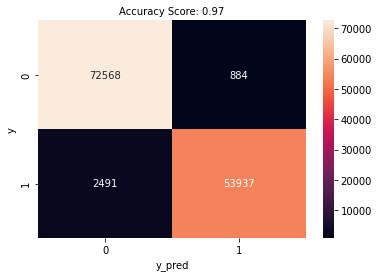

In [67]:
plot_confusion_matrix(y, y_pred)

In [68]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     73452
           1       0.98      0.96      0.97     56428

    accuracy                           0.97    129880
   macro avg       0.98      0.97      0.97    129880
weighted avg       0.97      0.97      0.97    129880



In [69]:
voting_clf

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('RF',
                              RandomForestClassifier(min_samples_split=15,
                                                     n_estimators=300)),
                             ('LightGBM',
                              LGBMClassifier(colsample_bytree=0.8, max_depth=10,
                                             n_estimators=500))],
                 voting='soft')

__________________________________________

Lgbm için overfit analizi yapmak istiyorum:

In [70]:
lgbm_model_ = LGBMClassifier()

In [71]:
lightgbm_params2 = [["learning_rate", [0.01, 0.1]],["n_estimators", [200, 300, 500]], ['max_depth', range(1, 20)], ["colsample_bytree", [0.9, 0.8, 1]]]

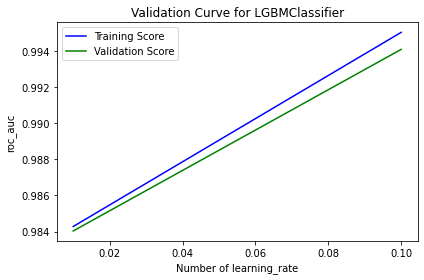

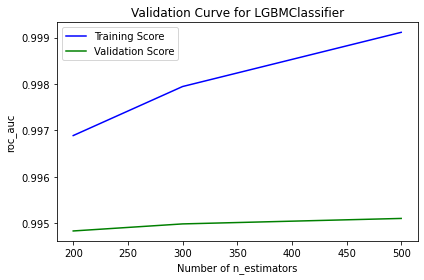

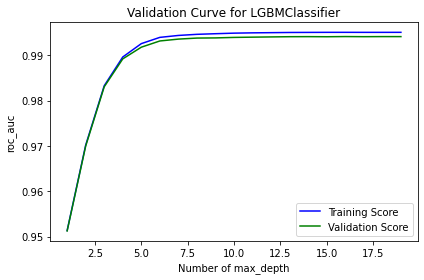

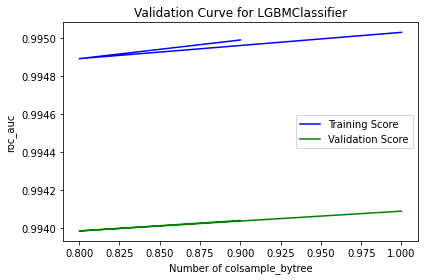

In [72]:
for i in range(len(lightgbm_params2)):
    val_curve_params(lgbm_model_, X, y, lightgbm_params2[i][0], lightgbm_params2[i][1])

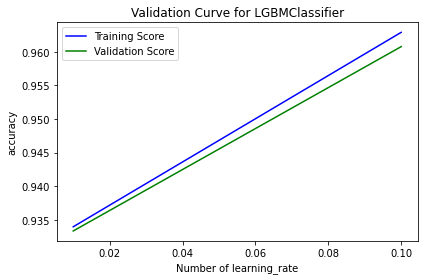

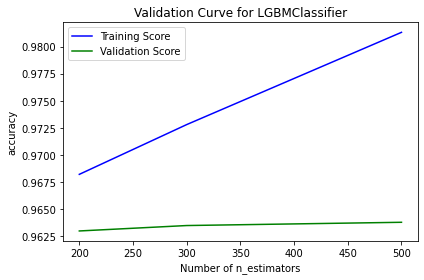

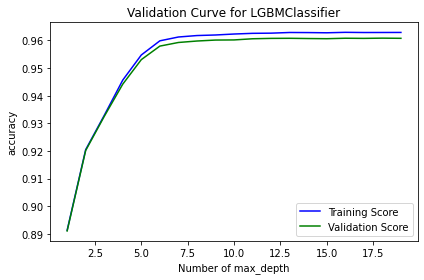

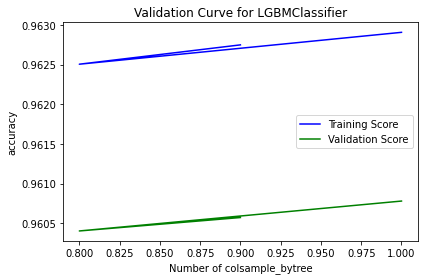

In [73]:
for i in range(len(lightgbm_params2)):
    val_curve_params(lgbm_model_, X, y, lightgbm_params2[i][0], lightgbm_params2[i][1], scoring="accuracy")

In [74]:
lgbm_best_grid_ = GridSearchCV(lgbm_model_, lightgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


In [75]:
lgbm_best_grid_.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 13,
 'n_estimators': 500}

In [76]:
lgbm_final = lgbm_model_.set_params(**lgbm_best_grid_.best_params_).fit(X, y)

In [77]:
cv_results_ = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [78]:
cv_results_['test_accuracy'].mean()

0.9637126578380043

In [79]:
cv_results_['test_f1'].mean()

0.9575186461591102

In [80]:
cv_results_['test_roc_auc'].mean()

0.9949647573607561